In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
import numpy as np


In [8]:
# Image size and batch size
img_size = (48, 48)
batch_size = 64
num_classes = 7  # Number of emotions you want to detect

# Data directories
train_dir = './train/'  # folder containing 3 emotion subfolders
test_dir = './test/'    # folder containing 3 emotion subfolders

# Learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96
)
optimizer = Adam(learning_rate=lr_schedule)


In [3]:
# Initialize image data generators
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

# Load validation/test data
validation_generator = validation_data_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
emotion_model = Sequential()

# Convolutional layers
emotion_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Conv2D(128, (3, 3), activation='relu'))
emotion_model.add(MaxPooling2D((2, 2)))
emotion_model.add(Dropout(0.25))

# Flatten and Dense layers
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(num_classes, activation='softmax'))  # 3 emotions

emotion_model.summary()


c:\Users\visha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,345,607 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
emotion_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


In [6]:
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


c:\Users\visha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 102s 222ms/step - accuracy: 0.3003 - loss: 1.7252 - val_accuracy: 0.4134 - val_loss: 1.5416
Epoch 2/30
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:22 184ms/step - accuracy: 0.4219 - loss: 1.5802

c:\Users\visha\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4219 - loss: 1.5802 - val_accuracy: 0.4068 - val_loss: 1.5368
Epoch 3/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 78s 175ms/step - accuracy: 0.4369 - loss: 1.4547 - val_accuracy: 0.4856 - val_loss: 1.3288
Epoch 4/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4688 - loss: 1.3718 - val_accuracy: 0.4883 - val_loss: 1.3272
Epoch 5/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 79s 176ms/step - accuracy: 0.4964 - loss: 1.3138 - val_accuracy: 0.5114 - val_loss: 1.2508
Epoch 6/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4688 - loss: 1.4986 - val_accuracy: 0.5081 - val_loss: 1.2521
Epoch 7/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 80s 179ms/step - accuracy: 0.5300 - loss: 1.2310 - val_accuracy: 0.5499 - val_loss: 1.1807
Epoch 8/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5625 - loss: 1.2109 - val_accuracy: 0.5512 - val_loss: 1.1810
Epoch 9/30
448/448 ━━━━━━━━━━━━━━━━━━━━ 80s 177ms/step - accuracy: 0.5570 - loss: 1.1678 - val_accurac

In [7]:
# Save model structure
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights
emotion_model.save_weights("emotion_model.weights.h5")
print("Model saved successfully!")



Model saved successfully!


In [14]:
from tensorflow.keras.models import model_from_json

# Load model structure
with open('emotion_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

emotion_model = model_from_json(loaded_model_json)

# Load weights with the correct filename
emotion_model.load_weights('emotion_model.weights.h5')

# Compile the model (necessary after loading weights)
from tensorflow.keras.optimizers import Adam
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Emotion dictionary
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 
                3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Save full model
emotion_model.save('emotion_model_full.keras')




In [17]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)  # Open webcam

face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray = gray_frame[y:y+h, x:x+w]
        cropped_img = cv2.resize(roi_gray, (48, 48))
        cropped_img = np.expand_dims(np.expand_dims(cropped_img, -1), 0) / 255.0

        prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [18]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
emotion_model = load_model('emotion_model_full.keras')

# Define emotion labels (must match training order!)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 
                3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Load face detector
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=3)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray = gray_frame[y:y+h, x:x+w]

        if roi_gray.size == 0:
            continue

        cropped_img = cv2.resize(roi_gray, (48, 48))
        cropped_img = np.expand_dims(np.expand_dims(cropped_img, -1), 0) / 255.0

        prediction = emotion_model.predict(cropped_img, verbose=0)
        maxindex = int(np.argmax(prediction))
        label = emotion_dict.get(maxindex, "Unknown")

        print("Prediction:", prediction, "→", label)

        cv2.putText(frame, label, (x+5, y-20),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Prediction: [[0.21858296 0.00219058 0.3023864  0.05135364 0.2035381  0.19827034
  0.02367795]] → Fearful
Prediction: [[0.22724438 0.00229145 0.29212925 0.05970524 0.19174078 0.19692416
  0.0299648 ]] → Fearful
Prediction: [[0.22829352 0.00219357 0.2832555  0.06223322 0.19730885 0.18979117
  0.03692416]] → Fearful
Prediction: [[0.22936785 0.00141812 0.27097055 0.05813082 0.22520624 0.18745832
  0.02744802]] → Fearful
Prediction: [[6.7199133e-02 3.0710752e-04 3.8401060e-02 6.8010503e-01 4.5549426e-02
  1.6278352e-01 5.6547034e-03]] → Happy
Prediction: [[0.21567863 0.00347137 0.21582721 0.07525788 0.2408957  0.23423141
  0.01463779]] → Neutral
Prediction: [[0.23622945 0.00612789 0.13457671 0.08716978 0.30579528 0.20878929
  0.02131161]] → Neutral
Prediction: [[0.19073118 0.01452841 0.16302878 0.1211381  0.29240182 0.16734739
  0.05082432]] → Neutral
Prediction: [[0.2295347  0.01111727 0.16202317 0.15013091 0.19418585 0.2082108
  0.0447973 ]] → Angry
Prediction: [[0.19012034 0.00414183 0.1

In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
emotion_model = load_model('emotion_model_full.keras')

# Define emotion labels (must match training order!)
emotion_dict = {
    0: "Angry", 
    1: "Disgusted", 
    2: "Fearful", 
    3: "Happy", 
    4: "Neutral", 
    5: "Sad", 
    6: "Surprised"
}

# Load face detector
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=3)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 2)
        roi_gray = gray_frame[y:y+h, x:x+w]

        if roi_gray.size == 0:
            continue

        # Preprocess ROI for the model
        cropped_img = cv2.resize(roi_gray, (48, 48))
        cropped_img = np.expand_dims(np.expand_dims(cropped_img, -1), 0) / 255.0

        # Predict emotion
        prediction = emotion_model.predict(cropped_img, verbose=0)[0]
        maxindex = int(np.argmax(prediction))
        label = emotion_dict[maxindex]
        confidence = prediction[maxindex] * 100

        # Print in terminal (optional)
        print(f"Prediction: {label} ({confidence:.2f}%)")

        # Draw label with confidence on frame
        text = f"{label}: {confidence:.2f}%"
        cv2.putText(frame, text, (x+5, y-20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Prediction: Fearful (28.83%)
Prediction: Angry (23.61%)
Prediction: Fearful (26.48%)
Prediction: Fearful (26.48%)
Prediction: Neutral (29.72%)
Prediction: Happy (35.29%)
Prediction: Happy (35.29%)
Prediction: Neutral (30.06%)
Prediction: Neutral (30.06%)
Prediction: Neutral (37.56%)
Prediction: Neutral (43.75%)
Prediction: Neutral (27.23%)
Prediction: Angry (26.64%)
Prediction: Neutral (24.16%)
Prediction: Neutral (26.00%)
Prediction: Fearful (25.59%)
Prediction: Neutral (32.98%)
Prediction: Neutral (29.03%)
Prediction: Fearful (24.37%)
Prediction: Neutral (25.23%)
Prediction: Neutral (29.31%)
Prediction: Neutral (27.89%)
Prediction: Fearful (22.54%)
Prediction: Neutral (30.40%)
Prediction: Neutral (26.64%)
Prediction: Neutral (36.30%)
Prediction: Neutral (25.35%)
Prediction: Neutral (35.43%)
Prediction: Angry (25.63%)
Prediction: Neutral (31.09%)
Prediction: Neutral (30.17%)
Prediction: Neutral (28.32%)
Prediction: Fearful (29.13%)
Prediction: Sad (25.62%)
Prediction: Sad (25.24%)
Pre

In [26]:
pip install "numpy<2" --upgrade


Note: you may need to restart the kernel to use updated packages.


c:\Users\visha\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


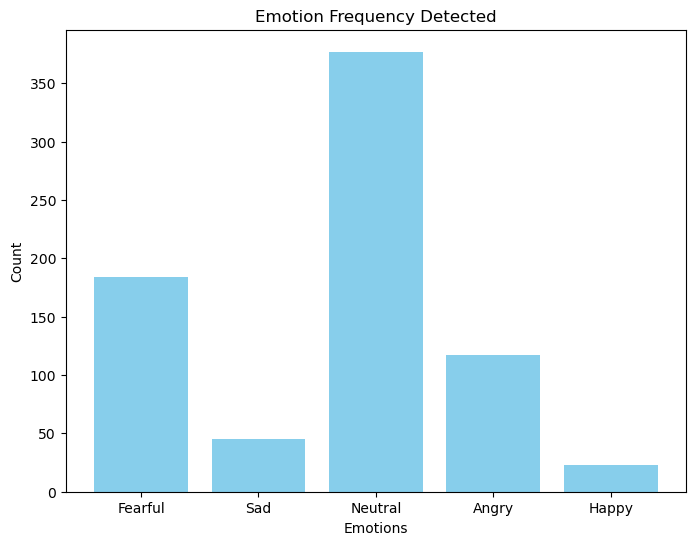

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from collections import Counter

# Load trained model
emotion_model = load_model('emotion_model_full.keras')

# Emotion labels
emotion_dict = {
    0: "Angry", 1: "Disgusted", 2: "Fearful",
    3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"
}

# Face detector
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Storage for predictions
predicted_emotions = []

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=3)

    for (x, y, w, h) in faces:
        roi_gray = gray_frame[y:y+h, x:x+w]

        if roi_gray.size == 0:
            continue

        cropped_img = cv2.resize(roi_gray, (48, 48))
        cropped_img = np.expand_dims(np.expand_dims(cropped_img, -1), 0) / 255.0

        prediction = emotion_model.predict(cropped_img, verbose=0)[0]
        maxindex = int(np.argmax(prediction))
        label = emotion_dict[maxindex]
        confidence = prediction[maxindex] * 100

        predicted_emotions.append(label)  # Save prediction

        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 2)
        cv2.putText(frame, f"{label}: {confidence:.2f}%", (x+5, y-20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press Q to quit
        break

cap.release()
cv2.destroyAllWindows()

# ========================
# Step 2: Plot the results
# ========================
emotion_counts = Counter(predicted_emotions)

plt.figure(figsize=(8,6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color="skyblue")
plt.title("Emotion Frequency Detected")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()


c:\Users\visha\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


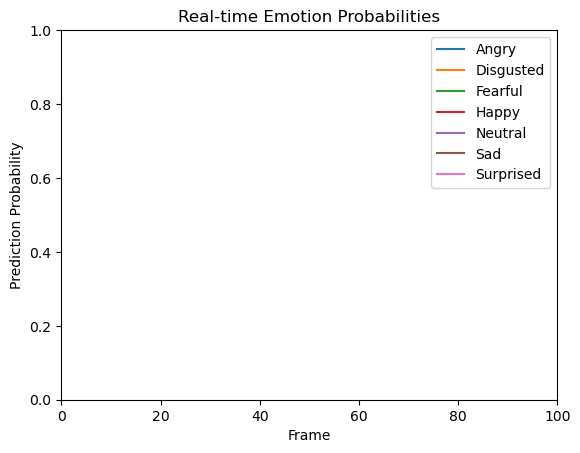

In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load trained model
emotion_model = load_model('emotion_model_full.keras')

# Emotion labels
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful",
                3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# Face detector
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

# Setup real-time line graph
plt.ion()
fig, ax = plt.subplots()
lines = {}
x_data = []
y_data = {emotion: [] for emotion in emotion_dict.values()}
frame_count = 0

for emotion in emotion_dict.values():
    (line,) = ax.plot([], [], label=emotion)
    lines[emotion] = line

ax.set_xlim(0, 100)   # show last 100 frames
ax.set_ylim(0, 1)     # probabilities between 0 and 1
plt.xlabel("Frame")
plt.ylabel("Prediction Probability")
plt.title("Real-time Emotion Probabilities")
plt.legend()

def update_graph():
    for emotion, line in lines.items():
        line.set_xdata(x_data)
        line.set_ydata(y_data[emotion])
    ax.relim()
    ax.autoscale_view(scalex=True, scaley=True)
    fig.canvas.draw()
    fig.canvas.flush_events()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=3)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray = gray_frame[y:y+h, x:x+w]

        if roi_gray.size == 0:
            continue

        cropped_img = cv2.resize(roi_gray, (48, 48))
        cropped_img = np.expand_dims(np.expand_dims(cropped_img, -1), 0) / 255.0

        prediction = emotion_model.predict(cropped_img, verbose=0)[0]
        maxindex = int(np.argmax(prediction))
        label = emotion_dict.get(maxindex, "Unknown")
        confidence = float(np.max(prediction)) * 100

        # Display emotion on video
        cv2.putText(frame, f"{label} ({confidence:.1f}%)", (x+5, y-20),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        # Update graph data
        frame_count += 1
        x_data.append(frame_count)
        for i, emotion in emotion_dict.items():
            y_data[emotion].append(prediction[i])

        # Keep last 100 points for smoother plot
        if len(x_data) > 100:
            x_data.pop(0)
            for e in y_data:
                y_data[e].pop(0)

    # Update real-time line graph
    update_graph()

    cv2.imshow('Emotion Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
plt.ioff()
plt.show()


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Recreate the architecture
model = Sequential([
# Convolutional layers
Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Dropout(0.25),

# Flatten and Dense layers
Flatten(),
Dense(1024, activation='relu'),
Dropout(0.5),
Dense(num_classes, activation='softmax')
])

# Load the old weights
model.load_weights("emotion_model.weights.h5")

# Save in a fresh format
model.save("emotion_model_fixed.h5")


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ⚠️ Ensure architecture matches your training setup
def create_model():
    model = Sequential([
# Convolutional layers
Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Conv2D(128, (3, 3), activation='relu'),
MaxPooling2D((2, 2)),
Dropout(0.25),

# Flatten and Dense layers
Flatten(),
Dense(1024, activation='relu'),
Dropout(0.5),
Dense(num_classes, activation='softmax')
])
    return model

model = create_model()
model.load_weights("emotion_model.weights.h5")  # <-- your original weights file
model.save_weights("emotion_model_clean.weights.h5")  # <-- clean weights only
print("✅ Clean weights saved as emotion_model_clean_weights.h5")


c:\Users\visha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Clean weights saved as emotion_model_clean_weights.h5


In [13]:
from keras.models import load_model

# Try loading the old model
model = load_model("emotion_model_full.keras", compile=False)

# Save weights only
model.save_weights("emotion_model_clean.weights.h5")
print("✅ Extracted and saved clean weights as emotion_model_clean.weights.h5")


✅ Extracted and saved clean weights as emotion_model_clean.weights.h5
